In [1]:
'hide_me'
#!/usr/bin/python
#Feature Format

""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""


import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ", feature, " not present"
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features






In [2]:
# This is a cell to hide code snippets from displaying
# Any cell that contains the word "hide_me" will be hidden.

from IPython.display import HTML

hide_me = 'hide_me'
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      if (id == 0 || $(this).html().indexOf('hide_me') > -1) {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:100" type="submit" value="View/Hide Code"></form>''')

## Background

In less than twenty years, Enron Corporation was founded, achieved a high of $90.75 USD per share, and went bankrupt. 

Several years after the company was founded, executive employees such as Jeffrey Skilling used various accounting methods, manipulation, and deception to hide billions of dollars of Enron debt. 

Data regarding these employees is now publically available. The data shows financial figures related to executive accounts and figures surrounding the company email communication. Can we use this data and machine learning techniques to determine who was committing fraud?

### The Enron Dataset

There were three different 'persons of interest' hand-generated for this dataset:
1. Those indicted
2. Those who settled without admitting guilt
3. Those who testified in exchange for immunity

Emails are collected for over 150 different individuals.

### The Purpose: Predicting POI

The goal of this project is to use machine learning techniques to create a method of predicting persons of interest. We have data records for 146 different individuals employed at Enron. Information about the financial and communication activity of these individuals during their time at Enron my show correlations to whether or not they committed fraud. Machine learning algorithms can help to find these underlying correlations and use them to predict which individuals committed fraud by building models. 

Not only do these models help us to understand what may have been going on behind the scenes at Enron, they may help people to detect this type of fraud in the future. Every company is different, and although the model that I will be building may not be suitable to detect suspicious activity at other companies, similar machine learning techniques can be used to model behavior in many different situations in order to make useful predictions.




In [3]:
'hide_me'
%cd "C:/Users/schro/Desktop/Projects/DataAnalysisND/P5-Machine/ud120-projects"

# load dataset

C:\Users\schro\Desktop\Projects\DataAnalysisND\P5-Machine\ud120-projects


## Data Overview

The Enron dataset is made up of 146 unique name entries, with each having 21 pieces of information (e.g. salary, expenses, poi). Out of the 146 individuals, 18 of them were persons of interest, as defined above, leaving 128 non-POI.

The features in the data fall into three main types: financial features, email features and POI labels. They are explained using the descriptions included in the original FindLaw dataset PDF document.


### Financial Features (in USD)

**'salary'** Reflects items such as base salary, executive cash allowances, and benefits payments.

**'bonus'** Reflects annual cash incentives paid based upon company performance. Also may include other retention payments.

**'deferred_income'** Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directors
under a deferred compensation arrangement. May also reflect deferrals under a stock option or phantom stock unit in lieu of cash arrangement.

**'deferral_payments'** Reflects distributions from a deferred compensation arrangement due to termination of employment or due to in-service withdrawals as per plan provisions.

**'loan_advances'** Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of the
promissory notes allow for the option to repay with stock of the company.

**'long_term_incentive'** Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success as measured against key performance drivers and business objectives over a multi-year period, generally 3 to 5 years.

**'director_fees'** Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.

**'expenses'** Reflects reimbursements of business expenses. May include fees paid for consulting services.

**'other'** Reflects items such as payments for severence, consulting services, relocation costs, tax advances and allowances for employees on international assignment (i.e.
housing allowances, cost of living allowances, payments under Enron’s Tax Equalization Program, etc.). May also include payments provided with respect to
employment agreements, as well as imputed income amounts for such things as use of corporate aircraft.

**'total_payments'** Total sum of above categories

#### Stock Value Features (USD)

**'exercised_stock_options'** Reflects amounts from exercised stock options which equal the market value in excess of the exercise price on the date the options were exercised either through
cashless (same-day sale), stock swap or cash exercises. The reflected gain may differ from that realized by the insider due to fluctuations in the market price and
the timing of any subsequent sale of the securities.

**'restricted_stock'** Reflects the gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to lapse of vesting
periods, regardless of whether deferred.

**'restricted_stock_deferred'** Reflects value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement.

**'total_stock_value'** Total sum of three stock values above. 

In 1998, 1999 and 2000, Debtor and non-debtor affiliates were charged for options granted. The Black-Scholes method was used to determine the amount to be
charged. Any amounts charged to Debtor and non-debtor affiliates associated with the options exercised related to these three years have not been subtracted
from the share value amounts shown.

### Email Features (number of emails)
**'to_messages'** Number of messages received. 

**'from_messages'** Number of messages sent.

**'shared_receipt_with_poi'** Number of emails received that were also received by a POI.

**'from_this_person_to_poi'** Number of emails sent to POI.

**'from_poi_to_this_person'** Number of emails received from POI.

 
###  Labels
**'poi'** POI status (integer, 0=Non-POI, 1=POI).

**'email_address'** Personal email address (string).


There are 35 individuals listed as a POI as gathered by hand (primarily from http://usatoday30.usatoday.com/money/industries/energy/2005-12-28-enron-participants_x.htm). Since we only have data and emails for 18 of these people, we will not be able to get as strong as a signal as we would be able to with the full data for the known POI. 

I also created a dictionary 'nan_dict' with counts of the number of missing values for each feature. Missing values are represented as 'NaN' for this dataset. The three feature with the most missing values were:

'director_fees': 129, 'loan_advances': 142, 'restricted_stock_deferred': 128

It's likely that these categories had missing values because most individuals never paid director fees or deferred stock. These values will be changed from 'NaN' to 0 to numerically compare these data to that of other individuals.

{'bonus': 64,
 'deferral_payments': 107,
 'deferred_income': 97,
 'director_fees': 129,
 'email_address': 35,
 'exercised_stock_options': 44,
 'expenses': 51,
 'from_messages': 60,
 'from_poi_to_this_person': 60,
 'from_this_person_to_poi': 60,
 'loan_advances': 142,
 'long_term_incentive': 80,
 'other': 53,
 'poi': 0,
 'restricted_stock': 36,
 'restricted_stock_deferred': 128,
 'salary': 51,
 'shared_receipt_with_poi': 60,
 'to_messages': 60,
 'total_payments': 21,
 'total_stock_value': 20}

In [18]:
'hide_me'
import pickle
import pprint 

enron_data = pickle.load(open("final_project/final_project_dataset.pkl", "r"))
#dictionary made up of keys with names (146 total)

print 'Number of individuals:', len(enron_data.keys())

#dictionaries for each name made up of 21 different entries
print 'Information for each individual:',enron_data.values()[0].keys()
print 'Number of entries for each individual:', len(enron_data.values()[1].keys())

#number of POI according to definition above
poi_names=[]
for name in enron_data:
    if enron_data[name]['poi']==1:
        poi_names.append(name)
print 'Number of POI:',len(poi_names)

#listed POI names
poi_total=open('final_project/poi_names.txt','r')
poi_total = poi_total.read().split(',')
#count names using comma as divider (disregard one count)
print 'Number of POI from compiled list:', len(poi_total)-1

#Count NaN entry count for each key
key_list=enron_data.values()[0].keys()

nan_dict=dict.fromkeys(key_list)

for key in key_list:
    i=0
    for name in enron_data:
        if enron_data[name][key]=='NaN':
            i+=1
    nan_dict[key]=i
pprint.pprint(nan_dict)


Number of individuals: 146
Information for each individual: ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
Number of entries for each individual: 21
Number of POI: 18
Number of POI from compiled list: 35
{'bonus': 64,
 'deferral_payments': 107,
 'deferred_income': 97,
 'director_fees': 129,
 'email_address': 35,
 'exercised_stock_options': 44,
 'expenses': 51,
 'from_messages': 60,
 'from_poi_to_this_person': 60,
 'from_this_person_to_poi': 60,
 'loan_advances': 142,
 'long_term_incentive': 80,
 'other': 53,
 'poi': 0,
 'restricted_stock': 36,
 'restricted_stock_deferred': 128,
 'salary': 51,
 'shared_receipt_with_poi': 60,
 'to_messages': 60,
 'tot

## Outliers

I visualized the features in the data using two boxplots: one plot for financial features and one for email features. Several things stood out to me. Almost all of the features had outliers outside of the IQR. I'll look at the largest points for each of the features to make sure they seem valid. I also noticed that some categories (such as 'restricted stock deferred') have both positive and negative values. I will also look at the negative data to understand if they should be analyzed as negative values and if they are valid.

When I first plotted the data, an extreme outlier showed up in the financial data. I realized that this is due to the 'total' row shown in the PDF, which was adding the total of all financial data for each individual. I removed this row from the dictionary so that it would not show up in my plots and the scale would make it possible to screen for other outliers.

Since the financial data was readily available to view as a PDF, I scrolled through the dataset to see if there were other outliers. Besides the row used as the total sum, there was an outlier named 'THE TRAVEL AGENCY IN THE PARK' with a footnote stating:

'Payments were made by Enron employees on account of business-related travel to The Travel Agency in the Park (later Alliance Worldwide), which was coowned by the sister of Enron's former Chairman. Payments made by the Debtor to reimburse employees for these expenses have not been included.'

I also removed this datapoint since it is not connected to a real individual who could be a POI. 

For individual 'LOCKHART EUGENE E', no financial data was given. After checking the data file, I noticed that every email field was filled with 'NaN' for Lockhart so I removed his data point as well. 



C:\Users\schro\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


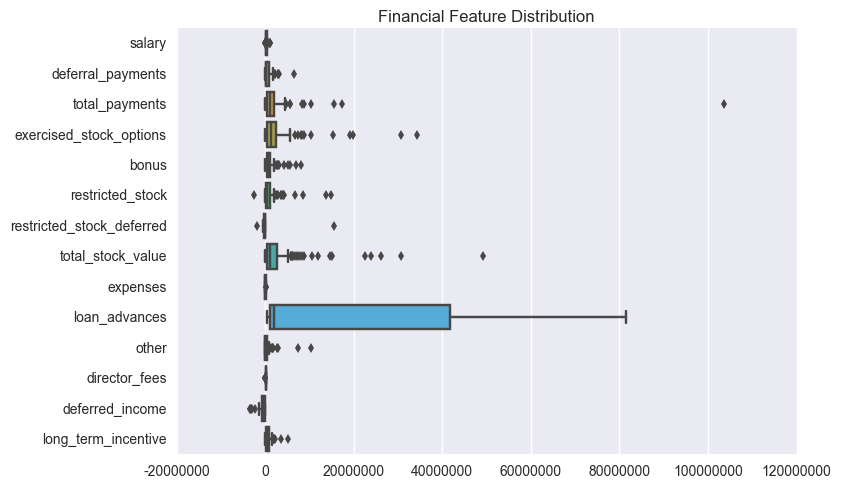

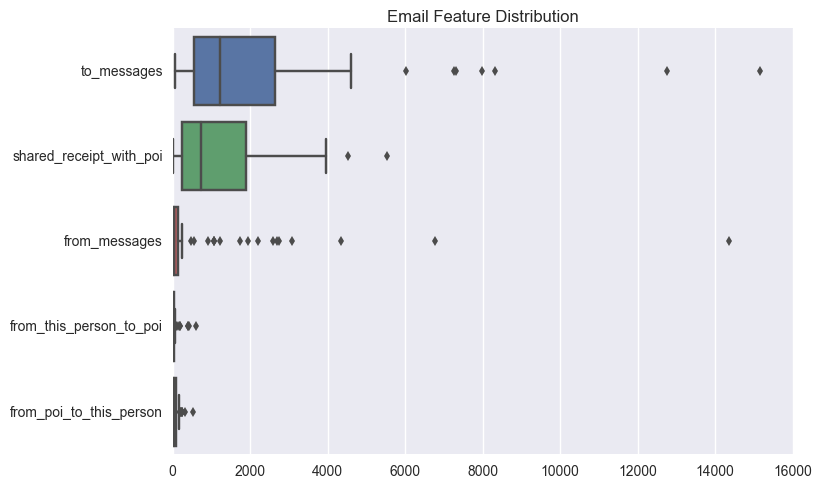

In [19]:
'hide_me'
enron_data.pop("LOCKHART EUGENE E", 0)
enron_data.pop("TOTAL", 0)
enron_data.pop("THE TRAVEL AGENCY IN THE PARK", 0)

import seaborn as sns
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import pandas as pd

#create dataframe that can be used to plot data
enron_df=pd.DataFrame(enron_data)
enron_df=enron_df.transpose()
enron_df=enron_df.convert_objects(convert_numeric=True)

financial_keys=['salary',  'deferral_payments', 'total_payments', 
                'exercised_stock_options', 'bonus', 'restricted_stock',  
                'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances','other', 
                'director_fees', 'deferred_income', 'long_term_incentive']
email_keys=['to_messages','shared_receipt_with_poi','from_messages','from_this_person_to_poi','from_poi_to_this_person']

#create axis
fig, ax = plt.subplots()
#create boxplot
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
#turn off scientific notation on x axis
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

sns.boxplot(data=enron_df[financial_keys],orient='h',ax=ax)
sns.plt.title('Financial Feature Distribution')
plt.show()

fig2, ax2 = plt.subplots()
sns.boxplot(data=enron_df[email_keys],orient='h')
sns.plt.title('Email Feature Distribution')
plt.show()



## Numerically Analyzing Outliers

In order to observe the outliers more closely, I wrote a function 'largest' to find the largest values for a specified .

I first looked at the financial data. The largest outlier was in the 'total payments' category, being the only value greater than one hundred million (100,000,000). It makes sense that the 'total payments' would have the largest value since it is composed of the sums of other financial features. This outlier was associated with CEO Kenneth Lay.

Looking through the largest values in other categories, I didn't see anything that looked invalid, but the summary will be useful as a reference when building models. I did notice that some categories contained both positive and negative values. In these categories, the data all had the same sign convention except for the data for Robert Belfer and Sanjay Bhatnager. In looking at their data entries on the original PDF, I found that sign conventions in the PDF were corrected, but the sign convention in this data was transferred incorrectly.

I edited all data for these two individuals to reflect the correct entries in the PDF. The new dictionary with fixed values was named 'enron_fix'.

I was curious about the distribution of 'load advances'. It turns out that there were only three sums of money recorded as loan advances:

1. ['LAY KENNETH L', 81525000, True],
2. ['FREVERT MARK A', 2000000, False],
3. ['PICKERING MARK R', 400000, False]

It seems like most people did not receive loan advances. Other NaN values could be changed to 0, although this feature may not give a large signal since there are only three recorded loan advances.


In [20]:
#function to find the highest outliers
'hide_me'
from pprint import pprint

def largest(enron_data,feature,num):   
    top_names={}
    i=1
    value=[float("inf"),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    individual=""
    poi=2
    while i<=num:
        for name in enron_data:
            if enron_data[name][feature]>value[i] and enron_data[name][feature]<value[i-1] and enron_data[name][feature]!='NaN':
                value[i]=enron_data[name][feature]
                individual=name
                poi=enron_data[name]['poi']   
        top_names[i]=[individual, value[i], poi]
        i+=1
    return top_names
    
#find the largest negative values
def largest_negative(enron_data,feature,num):   
    top_names={}
    i=1
    value=[-float("inf"),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    individual=""
    poi=2
    while i<=num:
        for name in enron_data:
            if enron_data[name][feature]<value[i] and enron_data[name][feature]>value[i-1] and enron_data[name][feature]!='NaN':
                value[i]=enron_data[name][feature]
                individual=name
                poi=enron_data[name]['poi']   
        top_names[i]=[individual, value[i], poi]
        i+=1
    return top_names

#search value for negative values so they can be fixed-data should not be negative
for key in key_list:
    pprint(key)
    pprint(largest(enron_data,key,5))
    if largest_negative(enron_data,key,1)[1][0]!='':
        print 'Negative Values Found'
        pprint(largest_negative(enron_data,key,3))
    print '\n'
    #decrease output once fixed
    break


'salary'
{1: ['SKILLING JEFFREY K', 1111258, True],
 2: ['LAY KENNETH L', 1072321, True],
 3: ['FREVERT MARK A', 1060932, False],
 4: ['PICKERING MARK R', 655037, False],
 5: ['WHALLEY LAWRENCE G', 510364, False]}




In [21]:
#fix data for Belfer and Bhatnager
'hide_me'
enron_fix=dict(enron_data)


enron_fix['BELFER ROBERT']['deferred_income'] = -102500
enron_fix['BELFER ROBERT']['deferral_payments'] = 'NaN'
enron_fix['BELFER ROBERT']['expenses'] = 3285
enron_fix['BELFER ROBERT']['director_fees'] = 102500
enron_fix['BELFER ROBERT']['total_payments'] = 3285
enron_fix['BELFER ROBERT']['exercised_stock_options'] = 'NaN'
enron_fix['BELFER ROBERT']['restricted_stock'] = 44093
enron_fix['BELFER ROBERT']['restricted_stock_deferred'] = -44093
enron_fix['BELFER ROBERT']['total_stock_value'] = 'NaN'

enron_fix['BHATNAGAR SANJAY']['other'] = 'NaN'
enron_fix['BHATNAGAR SANJAY']['expenses'] = 137864
enron_fix['BHATNAGAR SANJAY']['director_fees'] = 'NaN'
enron_fix['BHATNAGAR SANJAY']['total_payments'] = 137864
enron_fix['BHATNAGAR SANJAY']['exercised_stock_options'] = 15456290
enron_fix['BHATNAGAR SANJAY']['restricted_stock'] = 2604490
enron_fix['BHATNAGAR SANJAY']['restricted_stock_deferred'] = -2604490
enron_fix['BHATNAGAR SANJAY']['total_stock_value'] = 15456290



## Feature Creation - POI communication ratio

When coordinating between teams in large companies, there are many 'one-way' emails that are sent out to remind or update teams about various happenings. I think that a POI is more likely to have reciprocated, regular contact with other POIs. This would mean that they do not only have a large number of emails to and from other POI, but the ratio between these email counts would be closer to 1. I decided to make a feature that would include this information using two features:

**'from_this_person_to_poi'** Number of emails sent to POI.

**'from_poi_to_this_person'** Number of emails received from POI.
'to_messages',,'from_messages','from_this_person_to_poi','from_poi_to_this_person'

In order to understand what 'regular' contact is, I looked at the distribution of counts for these two variables. The majority of people hadn't sent or received emails with a POI. The median of emails sent to a POI was 8 emails. I initially subsetted data from individuals who had sent more than 8 emails to a POI. This would filter out individuals who had extemely infrequent communication with a POI, while including individuals who may have only been involved in short-term communication with a POI.

When using this feature in my decision tree model, I tried tuning the critical value of emails sent to a POI. I tried 8, 50, 100, 150, and 300. The critical value of 150 emails had the biggest effect on the decision tree model, increasing the precision and recall by approximately 5% from the models using other critical values of emails.

Using this large cutoff leaves only 7 datapoints for this feature that are greater than 0, with two of the individuals being POI. This feature could either be improving performance due to overfitting on a small dataset or it may be distiguishing executives based on subtle communication patterns.

KITCHEN LOUISE
0.772908366534
BECK SALLY W
2.68055555556
LAVORATO JOHN J
0.778409090909
MCCONNELL MICHAEL S
2.10869565217
POI
DELAINEY DAVID W
9.22727272727
KAMINSKI WINCENTY J
4.17073170732
KEAN STEVEN J
2.76428571429


C:\Users\schro\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


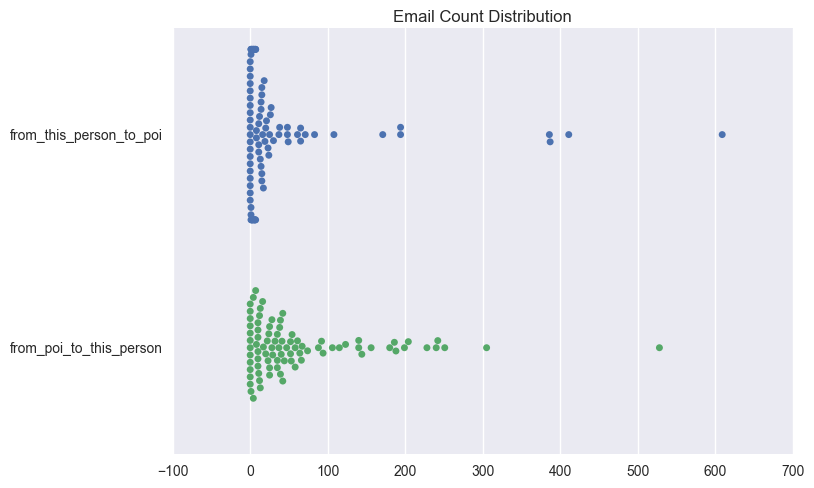

Mean:  from_this_person_to_poi    41.232558
from_poi_to_this_person    64.895349
comm_ratio                  0.157363
dtype: float64
Median:  from_this_person_to_poi     8.0
from_poi_to_this_person    35.0
comm_ratio                  0.0
dtype: float64
Mode:     from_this_person_to_poi  from_poi_to_this_person  comm_ratio
0                      0.0                      0.0         0.0


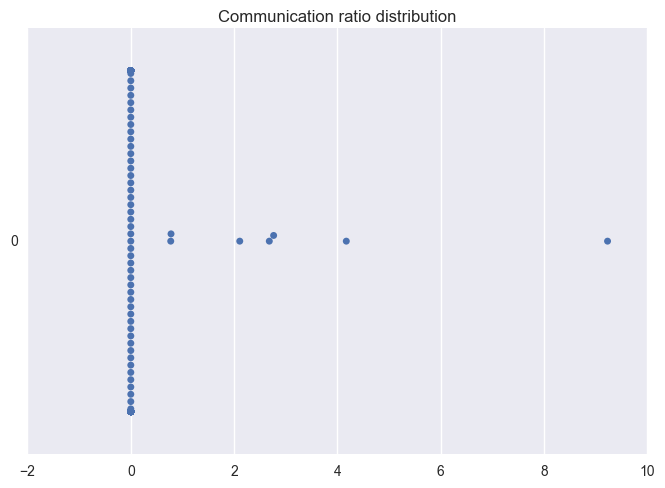

In [27]:
'hide_me'
#create communication ratio feature
comm_ratio_features=['from_this_person_to_poi', 'from_poi_to_this_person']
new_comm_ratio_features=['from_this_person_to_poi', 'from_poi_to_this_person','comm_ratio']

for individual in enron_fix:
    
    if enron_fix[individual]['from_this_person_to_poi']>150 and enron_fix[individual]['from_this_person_to_poi']!='NaN' and enron_fix[individual]['from_poi_to_this_person']>0 and enron_fix[individual]['from_poi_to_this_person']!='NaN':
        from_person=enron_fix[individual]['from_this_person_to_poi']
        from_poi=enron_fix[individual]['from_poi_to_this_person']
        enron_fix[individual]['comm_ratio'] = float(from_person)/from_poi
        if enron_fix[individual]['poi']==False:
            print individual
            print enron_fix[individual]['comm_ratio']
        else:
            print 'POI'
            print individual
            print enron_fix[individual]['comm_ratio']
        
    else: 
        #any individual with NaN values or low sending values will have a comm ratio of 0
        enron_fix[individual]['comm_ratio']=0

#reshape new dictionary into dataframe to use as needed   
enron_dfft=pd.DataFrame(enron_fix)
enron_dff=enron_dfft.transpose()
enron_dff=enron_dff.convert_objects(convert_numeric=True)

fig4, ax4 = plt.subplots()

#create swarmplot of communication distribution
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
sns.swarmplot(data=enron_dff[comm_ratio_features],orient='h',ax=ax4)
plt.title('Email Count Distribution')
plt.show()

print 'Mean: ', enron_dff[new_comm_ratio_features].mean(0)
print 'Median: ', enron_dff[new_comm_ratio_features].median(0)
print 'Mode: ', enron_dff[new_comm_ratio_features].mode(0)

fig5, ax5 = plt.subplots()
sns.swarmplot(data=enron_dff['comm_ratio'],orient='h',ax=ax5)
plt.title('Communication ratio distribution')
plt.show()


## Feature Selection

Although twenty different features are provided, I would like to use the minimum number possible in order to capture trends in the data. The dataset is limited and using all of the features may cause overfitting 

To understand what we're looking for, I looked at some of the specific charges for Enron executives. Many of the charges included wire fraud, money laundering, securities fraud, mail fraud, and conspiracy. For example, Skilling approved quarterly reports sent to the Securities and Exchange Comission with incorrect revenues and earnings. He gave incorrect information to Wall Street analysts. He committed securities fraud when using Raptors (backed by Enron stock) to hedge inflated asset values and hide Enron debt.

Skilling was also accused of insider trading after selling $62.6 million in stock (ten different trades) after understanding the company's dire financial situation. Lay was accused of bank Fraud as he obtained 75 million in loans from three banks and broke his agreement not to use the loan to carry or buy Enron stock on margin.

In looking for these types of activities, I think that communication could play an important role. When discussing public communication about Enron's financial situation, it would be important for the Enron exuctives to be closely aligned. For this reason, I'll be looking at the levels of communication (email_keys) between employees.

I'll also be looking at how much money individuals were receiving as stock, salary, and bonuses. I think that all of the financial features may not have the same level of importance in detecting fraud. Business expenses might be more related to the employees role in the company and stock might be a better indicator of the individual's belief in the success of the company or their personal rewards.

I'll start by using univariate feature selection to see which of these features have the greatest impact on POI detection.

financial_keys=['salary',  'deferral_payments', 
                'exercised_stock_options', 'bonus', 'restricted_stock',  
                'restricted_stock_deferred', 'expenses', 'loan_advances','other', 
                'director_fees', 'deferred_income', 'long_term_incentive']
                
email_keys=['to_messages','shared_receipt_with_poi','from_messages','from_this_person_to_poi','from_poi_to_this_person','comm_ratio']

The features total_payments and total_stock_value are simply sums of the values of other features, I will not be including them in the models. The information contained in them is already contained in these sub-features and may be combined more efficiently through a model.

## Validation: Training and Testing Data

Throughout this analysis, the generated models must be validated. This is accomplished by fitting the data to one portion of the data and testing (validating) the model on a different portion. For each model, I split the data into a training and a testing set. I performed fitting and feature selection on only the training data and tested my models on the test data.

When fitting the models on both the training and testing data, my accuracy is almost perfect. This is due to the fact that all of the test data is available and features are likely being overfit to the particiular data points.


In [23]:
'hide_me'
#!/usr/bin/python

#%cd "C:/Users/schro/Desktop/Projects/DataAnalysisND/P5-Machine/ud120-projects/validation"

#feature keys, first feature is the predicted feature
feature_keys= ['poi', 'salary', 'deferral_payments', 'exercised_stock_options',
                 'bonus', 'restricted_stock', 'restricted_stock_deferred',
                 'expenses', 'loan_advances', 'other', 'director_fees',
                 'deferred_income', 'long_term_incentive', 'to_messages',
                 'shared_receipt_with_poi', 'from_messages',
                 'from_this_person_to_poi', 'from_poi_to_this_person','comm_ratio'] 

import sys
sys.path.append("../tools/")
from sklearn import cross_validation

data = featureFormat(enron_fix, feature_keys,remove_NaN=True)
labels, features = targetFeatureSplit(data)

from sklearn.feature_selection import SelectKBest, f_classif


skb=SelectKBest(f_classif, k=6)

labels_train, labels_test, features_train, features_test=cross_validation.train_test_split(
labels,features,random_state=42,test_size=0.3)

#fit data to kbest algorithm
X_new = SelectKBest(f_classif,k='all')
X_new.fit_transform(features_train,labels_train)

indic= X_new.get_support(indices=True)

#create dataframe with scores and p values for each feature
feature=[]
score=[]
pvalue=[]
for i in indic:
    feature.append(feature_keys[i+1])
    score.append(X_new.scores_[i])
    pvalue.append(X_new.pvalues_[i])

results_k=pd.DataFrame(index=['Feature','Score','P-value'],data=[feature,score,pvalue])    
 
#edit dataframe for readability
results_k=results_k.transpose()
results_k=results_k.sort('P-value')
print results_k


                      Feature      Score      P-value
3                       bonus      12.52  0.000617304
0                      salary    10.6301   0.00153075
10            deferred_income    8.66324   0.00405383
2     exercised_stock_options    8.06021    0.0055016
13    shared_receipt_with_poi    5.15826    0.0253236
6                    expenses     4.9122    0.0289807
17                 comm_ratio    4.18156    0.0435469
15    from_this_person_to_poi    4.14881    0.0443605
16    from_poi_to_this_person    3.40729    0.0679277
9               director_fees     2.1186     0.148716
11        long_term_incentive    1.68324     0.197541
12                to_messages   0.693732     0.406923
8                       other   0.658035      0.41922
4            restricted_stock   0.573865     0.450545
5   restricted_stock_deferred   0.539079     0.464568
14              from_messages  0.0488056     0.825614
1           deferral_payments  0.0082095      0.92799
7               loan_advance

C:\Users\schro\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [7] are constant.
  UserWarning)
C:\Users\schro\Anaconda2\lib\site-packages\ipykernel\__main__.py:48: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


## Variable Selection: KBest

Kbest is an algorithm that's used to programatically perform univariate selection in order to select the most impactful variables. Using fewer variables reduces noise and overfitting in the models that are used for prediction.

When first looking at the kbest results, I looked at the p-value for the returned variable. The p-value indicates how likely an outcome is under the null hypothesis (the feature is not related to the POI prediction). I am interested in the variables that are most likely to be related to POI prediction so I am looking at the variables with the lowest p-value. 

Out of the 18 features, 8 had p-values less than 0.1. These were mainly financial features, but also included 'shared receipt with POI', 'from_poi_to_this_person', and my engineered feature 'comm_ratio'.

With these results, I chose to use these top 8 variables for the email and financial data.



## Evaluation Metrics

When evaluating my models, I focused on the precision, recall, and F1 score of my results. 

Accuracy is the proportion of items that are labelled correctly although it is unsuitable to evaluate the POI classification. The Enron dataset is very skewed and there is a relatively low number of POIs to detect. For this reason, even if the model were to predict that no POIs existed, the accuracy would remain high.

Recall is the proportion of points in a particular class that are correctly labelled. In this case, this would be the proportion of POIs that are correctly identified as POIs divided by the total number of POIs in the dataset.

Precision is the proportion of positive labels for a certain class that are correct. For the Enron dataset, this would be the proportion of correctly labelled POIs divided by the total number of labelled POIs in the dataset.

The F1 score was used as a measure of accuracy.

F1=2x(precision x recall)/(precision + recall)

If these models were used to gather names of suspects for further investigation at Enron, I think it would be better to optimize the recall of the model. If the model is not being used to convict, but to understand who to investigate further (i.e. which person's company documents to inspect), it is more important that no POI goes undetected because false positives would be later eliminated.

## Random Forest Model

I starting by using a random forest model on my eight chosen variables. I chose this model because it makes a nonlinear decision using linear surfaces. Unlike support vector machines, feature scaling is not an issue. Outliers may have less of a negative impact on the model since data separation is not determined by linear distance. It can be prone to overfitting, so I started by using my Kbest model in a pipeline to investigate the top 8 variables.

I noticed that changing the size of the test data from 30% to 20% significantly changed the performance of the model. This is probably due to the small size of the dataset. I looked at the POIs in both test sets. With six to detect in the first set, and four in the second, this is a very small test set to be using to get a large recall and precision. Instead of just testing and training on two groups of data, I will use cross validation to validate my models


In [28]:
'hide_me'
#!/usr/bin/python

import sys
sys.path.append("../tools/")


### first element is our labels, any added elements are predictor features.
#The top eight keys were included in this list
kbest_keys=['poi', 'salary', 'comm_ratio', 'from_poi_to_this_person',  
                'exercised_stock_options', 'bonus',  'expenses', 'deferred_income', 'shared_receipt_with_poi']


kbest_data = featureFormat(enron_fix, kbest_keys,remove_NaN=True)
labels, features = targetFeatureSplit(kbest_data)
#split data into test and training sets

#decision tree
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit

clf=tree.DecisionTreeClassifier()

labels_train, labels_test, features_train, features_test=cross_validation.train_test_split(
labels,features,random_state=42,test_size=0.3)

#train and fit decision tree model to top 8 variables
clf.fit(features_train,labels_train)
poi_result=clf.predict(features_test, labels_test)

#print accuracy, precision, recall scores
print 'Test size 30%'
from sklearn.metrics import accuracy_score
print 'Accuracy: ',(accuracy_score(labels_test, poi_result))

from sklearn.metrics import precision_score
print 'Precision: ',(precision_score(labels_test,poi_result))

from sklearn.metrics import recall_score
print 'Recall: ',(recall_score(labels_test,poi_result))

print (labels_test)
print ""

#repeat for test size of 0.2
labels_train, labels_test, features_train, features_test=cross_validation.train_test_split(
labels,features,random_state=42,test_size=0.2)

clf.fit(features_train,labels_train)
poi_result=clf.predict(features_test, labels_test)

print 'Test size 20%'
from sklearn.metrics import accuracy_score
print 'Accuracy: ',(accuracy_score(labels_test, poi_result))

from sklearn.metrics import precision_score
print 'Precision: ',(precision_score(labels_test,poi_result))

from sklearn.metrics import recall_score
print 'Recall: ',(recall_score(labels_test,poi_result))

print (labels_test)



Test size 30%
Accuracy:  0.809523809524
Precision:  0.0
Recall:  0.0
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

Test size 20%
Accuracy:  0.821428571429
Precision:  0.333333333333
Recall:  0.25
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]


## Cross Validation of Model

Cross validation allows a model to be tested iteratively; the data is split into many sets of training and testing data. Each of the sets is tested independantly and the results are averaged. The GridSearchCV module is used not only for cross validation, but also for parameter tuning. By allowing the model to iterate through more samples of the data, new, signals may appear. 

Instead of guessing and checking the optimal fold size (iteration size), I used a function called StratifiedShuffleSplit. The data are shuffled and split into pairs of train and test sets. The stratified function ensures that each of the test/train sets have a similar proportion of POIs in them. This is useful for data sets like the Enron dataset where one outcome (non-POI) is much more likely. It prevents samples with POIs being over or under-represented. I increased the parameter of the number of iterations to 100 and the random state is 42 to ensure the data is shuffled through many iterations.

When it comes to testing models, a classic mistake can be to test your model on the same set of data used for training. This may give a suspiciously large accuracy score. The data can over overfit to this test data, so any large outliers are accounted for and predicted. These predictions can be used to detect the same outliers, but if we were given new data, the accuracy would drastically decrease since the model's parameters were based only on the test data.


## Parameter Tuning

Parameters for different functions can be tuned by specifying parameter options within the GridSearchCV module. GridSearchCV will then fit the model using all combinations of the specified parameters and it will return the model with parameters that give the best performance. Since performance is subjective, the 'scoring' method can be specified. Since I am most interested in precision and recall, I chose to use the 'f1' score as my performance metric.

If parameters are not tuned well, the model may miss critical information or overfit the model. By trying using a decision tree model that splits the data into very small subcategories (min split) you have the possibility of overfitting the model and getting a low validation score. By only splitting the data into broad categories through a decision tree, you may miss important signals. By comparing both situations, the best number of splits is chosen and the parameter is tuned.

For the decision tree parameter options, I used the default 'gini' to measure the quality of a split since most of the imput variables are continuous. 'Gini' finds the largest class, and 'entropy' finds groups of classes that make up ~50% of the data2. 

I varied the minimum sample split value between 2 and 4 in the GridSearchCV analysis. This relates to how big a node needs to be to be split again. Higher numbers will lead to less intricate splitting. I varied the max depth of the tree from 'none' (where the minimum split value is used as the default parameter) down to 10, which would allow the tree only 10 rounds of splitting. 


In [38]:
'hide_me'
#!/usr/bin/python
import sys
from sklearn import cross_validation
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

feature_keys_no_comm= ['poi', 'salary', 'deferral_payments', 'exercised_stock_options',
                 'bonus', 'restricted_stock', 'restricted_stock_deferred',
                 'expenses', 'loan_advances', 'other', 'director_fees',
                 'deferred_income', 'long_term_incentive', 'to_messages',
                 'shared_receipt_with_poi', 'from_messages',
                 'from_this_person_to_poi', 'from_poi_to_this_person'] 

data = featureFormat(enron_fix, feature_keys, remove_NaN=True)
labels, features = targetFeatureSplit(data)

#divide data into training and testing set
labels_train, labels_test, features_train, features_test=cross_validation.train_test_split(
labels,features,random_state=42,test_size=0.3)

#use decision tree classifier
tree_clf=tree.DecisionTreeClassifier()
#select best features to use in pipeline
X_new = SelectKBest()
#build pipeline to pick kbest parameters and model with decision tree
pipe = Pipeline(steps=[("SKB", X_new),("Tree",tree_clf)])

parameters = {'SKB__k': [6,7,8], 'Tree__min_samples_split':[2,4,8],
              'Tree__max_depth':[None,1,2,3], 'Tree__splitter':['best', 'random'],
                'Tree__random_state':[42] }

#model using stratified shuffle split 
sss= StratifiedShuffleSplit(random_state = 42)
gs = GridSearchCV(pipe, parameters, scoring='f1', cv=sss)
gs.fit(features_train, labels_train)


from sklearn.metrics import f1_score
prediction = gs.predict(features_test)
print 'Precision:', precision_score(labels_test, prediction)
print 'Recall:', recall_score(labels_test, prediction)
print 'F1 Score:', f1_score(labels_test, prediction)
be= gs.best_estimator_
print be
indic= be.named_steps['SKB'].get_support(indices=True)

#add decision tree importances to output

dt=0
for i in indic:
    print feature_keys[i+1]
    print 'score',be.named_steps['SKB'].scores_[i]
    print 'p value', be.named_steps['SKB'].pvalues_[i]  
    print 'Decision Tree Feature Importance:', be.named_steps['Tree'].feature_importances_[dt]
    dt+=1
    print ''
    

from sklearn.model_selection import GridSearchCV
# The optimal model selected by GridSearchCV:
be= gs.best_estimator_
print be

    

Precision: 0.307692307692
Recall: 0.8
F1 Score: 0.444444444444
Pipeline(steps=[('SKB', SelectKBest(k=6, score_func=<function f_classif at 0x000000000C538668>)), ('Tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))])
salary
score 10.6301050225
p value 0.00153074865441
Decision Tree Feature Importance: 0.206978588422

exercised_stock_options
score 8.06020611576
p value 0.00550160331772
Decision Tree Feature Importance: 0.274136837752

bonus
score 12.5199684857
p value 0.000617304311862
Decision Tree Feature Importance: 0.102205203521

expenses
score 4.9121987466
p value 0.028980670668
Decision Tree Feature Importance: 0.416679370306

deferred_income
score 8.66324010579
p value 0.004053828324
Decision Tree Feature Importance: 

## DT Results

The decision tree ranks difference features based on their importance. A feature importance score for a feature is the normalized reduction of the criterion brought by the feature. The most important features in the DT model turned out to be 'exercized stock options', 'shared receipt with poi', and my created feature, communication ratio. My precision and recall scores were 30% and 80%, respectively.

Precision: 0.3077
Recall: 0.8
F1 Score: 0.4444

I looked at the results of this same model without the communication ratio feature. Precision and the F1 score were both reduced. The features from_this_person_to_poi and from_poi_to_this_person were both added with the Kbest algorithm, likely to compensate for the communication information loss.

Precision: 0.3 
Recall: 0.6  
F1 Score: 0.4  


## Gaussian Naive Bayes

I looked to see if a Gaussian naive bayes algorithm could improve the accuracy and precision of my model. The Gaussian naive bayes algorithm can be used for classification by assuming the liklihood of the features is Gaussian. It applies Bayes’ theorem with the “naive” assumption that every pair of features is independant. 

I used a similar pipeline as the one from the decision tree model; I used SelectKBest to pick the 6-8 most important variables. Precision was slightly higher and recall was lower than that of the decision tree model:

Precision: 0.375
Recall: 0.6
F1 Score: 0.461538461538

I think that the recall was lower for this model since interactions between variables are not taken into account. The financial and email attributes of individuals may be related since they are all highly connected to their work and status at Enron. I think that for this model, it might be more important to have a higher recall score so that POI do not go undetected. With a lower precision, innocent POIs should not be proven to be guilty.


In [43]:
#!/usr/bin/python
'hide_me'
import sys
sys.path.append("../tools/")
from sklearn.naive_bayes import GaussianNB


### first element is our labels, any added elements are predictor
### features.

data = featureFormat(enron_fix, feature_keys,remove_NaN=True)
labels, features = targetFeatureSplit(data)

labels_train, labels_test, features_train, features_test=cross_validation.train_test_split(
labels,features,random_state=42,test_size=0.3)

gaussian=GaussianNB()
X_new = SelectKBest()

pipeG = Pipeline(steps=[("SKB", X_new),("gaussian",gaussian)])

parametersG = {'SKB__k': [6,7,8] }
cv_strata = StratifiedShuffleSplit(random_state=42)

gsn = GridSearchCV(pipeG, parametersG, scoring='f1', cv=cv_strata)
gsn.fit(features_train, labels_train)
print 'GridSearchCV Score:', gsn.score(features_test,labels_test)

# The optimal model selected by GridSearchCV:
beg= gsn.best_estimator_
print beg
print ""

from sklearn.metrics import f1_score
prediction = gsn.predict(features_test)
print 'Precision:', precision_score(labels_test, prediction)
print 'Recall:', recall_score(labels_test, prediction)
print 'F1 Score:', f1_score(labels_test, prediction)

print 'Class Probability in NB: ' ,beg.named_steps['gaussian'].class_prior_ 
print ""
indic= beg.named_steps['SKB'].get_support(indices=True)
for i in indic:
    print 'KBest Chosen Feature:', feature_keys[i+1]
    print 'score:',beg.named_steps['SKB'].scores_[i]
    print 'p value:', beg.named_steps['SKB'].pvalues_[i]
    print ''
    




GridSearchCV Score: 0.461538461538
Pipeline(steps=[('SKB', SelectKBest(k=7, score_func=<function f_classif at 0x000000000C538668>)), ('gaussian', GaussianNB(priors=None))])

Precision: 0.375
Recall: 0.6
F1 Score: 0.461538461538
Class Probability in NB:  [ 0.87  0.13]

KBest Chosen Feature: salary
score: 10.6301050225
p value: 0.00153074865441

KBest Chosen Feature: exercised_stock_options
score: 8.06020611576
p value: 0.00550160331772

KBest Chosen Feature: bonus
score: 12.5199684857
p value: 0.000617304311862

KBest Chosen Feature: expenses
score: 4.9121987466
p value: 0.028980670668

KBest Chosen Feature: deferred_income
score: 8.66324010579
p value: 0.004053828324

KBest Chosen Feature: shared_receipt_with_poi
score: 5.15826338364
p value: 0.0253236050293

KBest Chosen Feature: from_this_person_to_poi
score: 4.14881209393
p value: 0.044360476004



## Summary

I think that this dataset was too small to create an incredibly powerful model that can predict a POI, but I was able to discover important trends and attributes within the dataset. I learned that salary, stock options, expenses, and bonuses were all related to POI identification. This is not necessarily suprising because a POI would be likely to have power and influence within Enron. POI may also have trends in their emailing habits, but this may be better determined using a larger dataset.

Trying different models and features is an important part of the process when making predictions. Creating a feature for the email communication ratio turned out to have a powerful effect on the decision tree model. Further research could be performed on the individuals in the dataset to add information to the model. Employee details such as the length of time employed may be available. Text learning could be performed on email content to pick up on particular types of negotions. Better data and more information within features is usually more important than fine-tuning models. 
